Import important modules

In [8]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

Creating data

In [9]:
input_list = np.random.randint(0, 40000, (5000, 2))

sum_input_list = np.sum(input_list, axis=1)

#output_list = np.array([[sum_input_list[i]] for i in range(sum_input_list.shape[0])])

output_list = input_list[:, 0] - input_list[:, 1]

# Reshape the result array to a column vector
output_list = output_list.reshape(-1, 1)

Splitting data into training and testing

In [10]:
input_list_train, input_list_test, output_list_train, output_list_test = train_test_split(input_list, output_list, test_size=0.2)

Defining keras model

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

Compiling the model

In [12]:
model.compile(optimizer='adam', loss='mean_squared_error')

Training the model

In [13]:
fitValues = model.fit(input_list, output_list, epochs=6, batch_size=4)

Epoch 1/6
1250/1250 [==============================] - 3s 2ms/step - loss: 22776422.0000
Epoch 2/6
1250/1250 [==============================] - 4s 3ms/step - loss: 25412.4004
Epoch 3/6
1250/1250 [==============================] - 3s 2ms/step - loss: 4066.3572
Epoch 4/6
1250/1250 [==============================] - 3s 2ms/step - loss: 2536.9587
Epoch 5/6
1250/1250 [==============================] - 3s 2ms/step - loss: 6305.8921
Epoch 6/6
1250/1250 [==============================] - 3s 2ms/step - loss: 7015.1118


Create a plot from the training losses x epoch

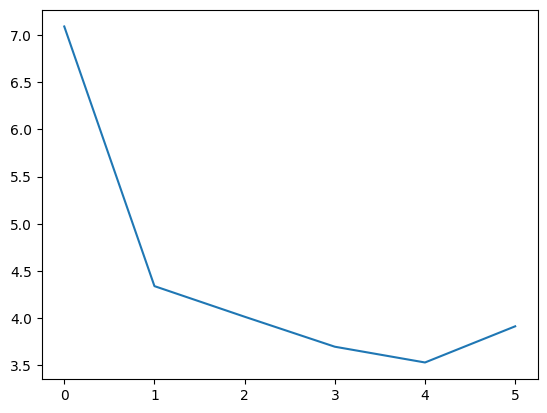

[12268700.0, 21860.486328125, 10367.4853515625, 4991.42919921875, 3398.860107421875, 8208.0322265625]


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import math

y = [math.log(i, 10) for i in list(fitValues.history["loss"])]
x = [i for i in range(len(list(y)))]

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()
print(fitValues.history["loss"])

Making predictions with our new model

In [8]:
new_input = np.array([[80, 70], [50, 30], [90, 100]])
predictions = model.predict(new_input)
print("{:<10s}{:<15s}{}".format(" ", "prediction", "actual"))
for i in range(len(predictions)):
    x, y = new_input[i]
    predicted_val = predictions[i][0]
    actual_val = x - y
    print("{:<10s}{:<15s}{}".format(str(x) + "-" + str(y) + ":", str(predicted_val), str(actual_val)))

1/1 [==============================] - 0s 70ms/step
          prediction     actual
80-70:    10.183656      10
50-30:    20.194124      20
90-100:   -9.825051      -10


Evaluating the Ultimate AI that we just made!!!!!

In [9]:
model.evaluate(input_list_test, output_list_test)

32/32 [==============================] - 0s 804us/step - loss: 49.3845


49.38454055786133

Check if this model is already exported, if not export it

In [10]:
import pickle
import os
import pathlib

oneUp = pathlib.Path(os.path.dirname(os.path.dirname(os.path.abspath('__file__'))))
print("oneUp:", oneUp)

preModels = pathlib.Path(oneUp.joinpath('preTrainedModels'))
preModels.mkdir(parents=True, exist_ok=True) #If preModels dosent exist, create it
print("preModels:", preModels)

pkFile = oneUp.joinpath(preModels).joinpath("NN-Sub.pkl")
pkFile = pathlib.Path(preModels.joinpath("NN-Sub.pkl"))
print("pkFile", pkFile)

with pkFile.open('w+b') as f: # 'w' = write, '+' = create file if non existant, 'b' = write in binary
    pickle.dump(model, f)

c:\Users\marti\Desktop\PythonProjects\simplePythonAI\preTrainedModels\NN-Sub.pkl
True


In [11]:
with open(pkFile, "rb") as f:
    data = pickle.load(f)
    print("data type"+str(type(data)))
    numbers = np.array([[15, 15]])
    prediction = data.predict(numbers)
    print(prediction)

data type<class 'keras.engine.sequential.Sequential'>
1/1 [==============================] - 0s 43ms/step
[[0.19639757]]
